Merged DataFrame:
  level      fr      it
0    CP   26.50   39.18
1   CE1   66.00  107.41
2   CE2  117.45  164.71
3   CM1  143.49     NaN
4   CM2  175.29  257.29


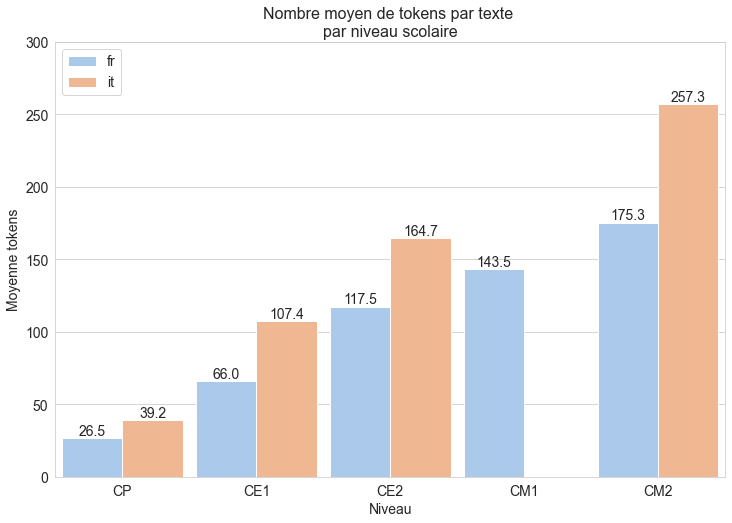

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dizionari con i valori medi di tokens per livello
# Sostituisci i valori numerici con quelli reali
moy_tokens_fr_dict = {
    'CP': 26.5,
    'CE1': 66,
    'CE2': 117.45,
    'CM1': 143.49,
    'CM2': 175.29
}

moy_tokens_ita_dict = {
    'CP': 39.18,
    'CE1': 107.41,
    'CE2': 164.71,
    'CM2': 257.29,
}

# Creazione DataFrame a partire dai dizionari
levels = ['CP', 'CE1', 'CE2', 'CM1', 'CM2']

df_fr = pd.DataFrame(list(moy_tokens_fr_dict.items()), columns=['level', 'fr'])
df_it = pd.DataFrame(list(moy_tokens_ita_dict.items()), columns=['level', 'it'])

# Merge dei due DataFrame
merged_df = pd.merge(df_fr, df_it, on='level', how='outer')

# Ordina i livelli
merged_df['level'] = pd.Categorical(merged_df['level'], categories=levels, ordered=True)
merged_df = merged_df.sort_values('level')

# **Controllo**
print("Merged DataFrame:")
print(merged_df)

# Melt per il grafico
melted_df = merged_df.melt(id_vars='level', var_name='Dataset', value_name='Value')

# Plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
fig = plt.gcf()
fig.patch.set_facecolor('white')

ax = sns.barplot(x='level', y='Value', hue='Dataset', data=melted_df,
                 palette='pastel', dodge=True, width=0.9)

# Etichette sopra le barre
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=14)
        
# Etichette asse e titolo
plt.xlabel("Niveau", fontsize=14)
plt.ylabel("Moyenne tokens", fontsize=14)
ax.set_title('Nombre moyen de tokens par texte \npar niveau scolaire', fontsize=16)
ax.legend(title='', loc='upper left', fontsize=14)
ax.set_ylim(0, 300)
ax.tick_params(axis='both', labelsize=14)

# Salvataggio del grafico
plt.savefig('./compare_moy_tokens.png', dpi=1200, bbox_inches='tight')
plt.show()